In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

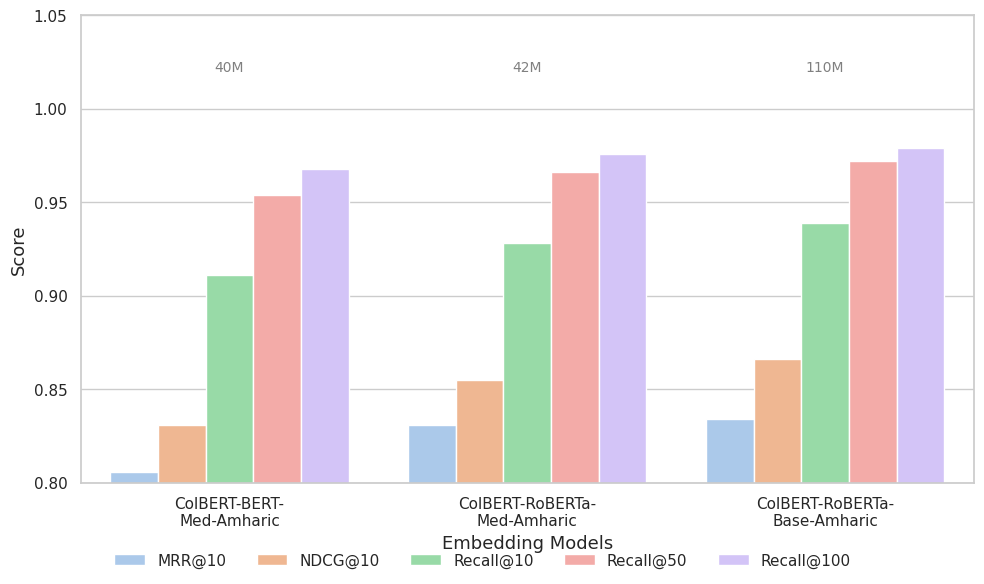

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data from the LaTeX table
models = [
    "ColBERT-BERT-\nMed-Amharic",
    "ColBERT-RoBERTa-\nMed-Amharic",
    "ColBERT-RoBERTa-\nBase-Amharic"
]
params = [40, 42, 110]
mrr = [0.806, 0.831, 0.834]
ndcg = [0.831, 0.855, 0.866]
recall10 = [0.911, 0.928, 0.939]
recall50 = [0.954, 0.966, 0.972]
recall100 = [0.968, 0.976, 0.979]

# Prepare data in long format
plot_data = pd.DataFrame({
    'Model': models * 5,
    'Metric': ['MRR@10'] * 3 + ['NDCG@10'] * 3 + ['Recall@10'] * 3 + ['Recall@50'] * 3 + ['Recall@100'] * 3,
    'Score': mrr + ndcg + recall10 + recall50 + recall100
})

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data, palette='pastel')

# Annotate parameter values above bars
for i, model in enumerate(plot_data['Model'].unique()):
    ax.text(i, 1.02, f"{params[i]}M", ha='center', fontsize=10, color='gray')

# Move legend below
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.45, -0.12),  # ← slightly left
    ncol=5,
    frameon=False
)

plt.xlabel('Embedding Models', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.ylim(0.80, 1.05)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("barchart_colbert_amharic_models_final.pdf", format="pdf", dpi=300)
plt.show()
plt.close()



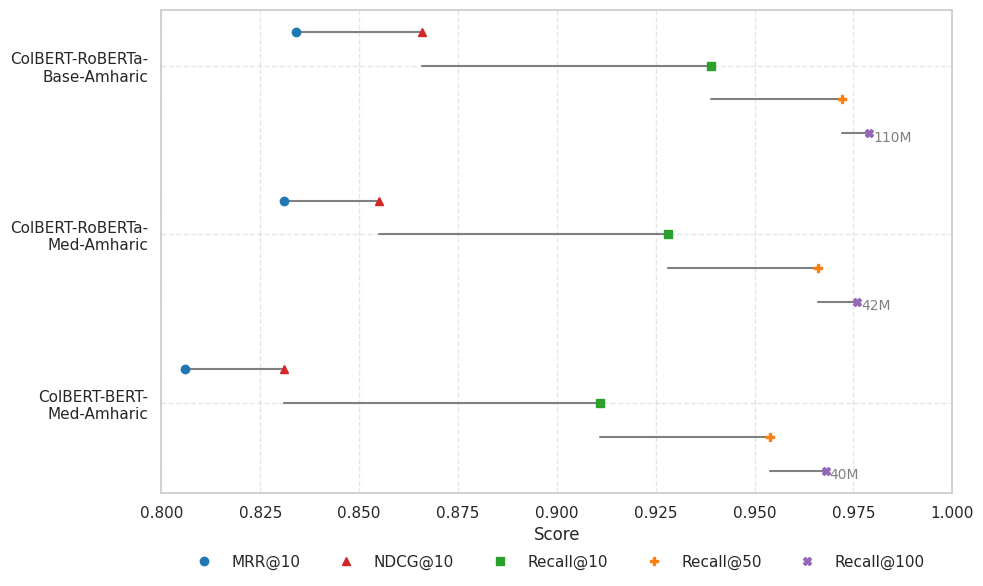

In [27]:
# Dumbbell Plot
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(models)):
    ax.plot([mrr[i], ndcg[i]], [i + 0.2, i + 0.2], 'gray', lw=1.5)
    ax.plot([ndcg[i], recall10[i]], [i, i], 'gray', lw=1.5)
    ax.plot([recall10[i], recall50[i]], [i - 0.2, i - 0.2], 'gray', lw=1.5)
    ax.plot([recall50[i], recall100[i]], [i - 0.4, i - 0.4], 'gray', lw=1.5)

    ax.plot(mrr[i], i + 0.2, 'o', color='#1f77b4', label='MRR@10' if i == 0 else "")
    ax.plot(ndcg[i], i + 0.2, '^', color='#d62728', label='NDCG@10' if i == 0 else "")
    ax.plot(recall10[i], i, 's', color='#2ca02c', label='Recall@10' if i == 0 else "")
    ax.plot(recall50[i], i - 0.2, 'P', color='#ff7f0e', label='Recall@50' if i == 0 else "")
    ax.plot(recall100[i], i - 0.4, 'X', color='#9467bd', label='Recall@100' if i == 0 else "")
    ax.text(recall100[i] + 0.001, i - 0.45, f"{params[i]}M", fontsize=10, color='gray')

ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xlabel("Score")
ax.set_xlim(0.80, 1.0)
ax.grid(True, linestyle='--', alpha=0.5)
# ax.legend(loc='lower right')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=5, frameon=False)
plt.tight_layout()
plt.savefig("dumbbell_colbert_amharic_models.pdf", format="pdf", dpi=300)
plt.show()
plt.close()

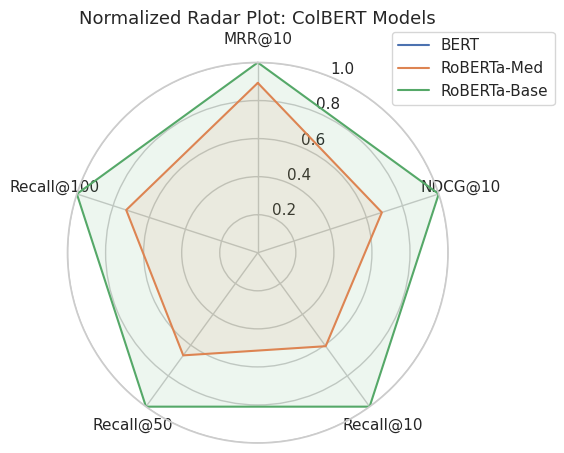

In [24]:
# Radar Plot
radar_data = pd.DataFrame({
    'Model': ['BERT', 'RoBERTa-Med', 'RoBERTa-Base'],
    'MRR@10': mrr,
    'NDCG@10': ndcg,
    'Recall@10': recall10,
    'Recall@50': recall50,
    'Recall@100': recall100
}).set_index('Model')

# Normalize for radar chart
normalized = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())
labels = normalized.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for idx, row in normalized.iterrows():
    values = row.tolist() + row.tolist()[:1]
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Normalized Radar Plot: ColBERT Models", fontsize=13, y=1.08)
plt.tight_layout()
plt.savefig("radarplot_colbert_amharic_models.pdf", format="pdf", dpi=300)
plt.show()
plt.close()


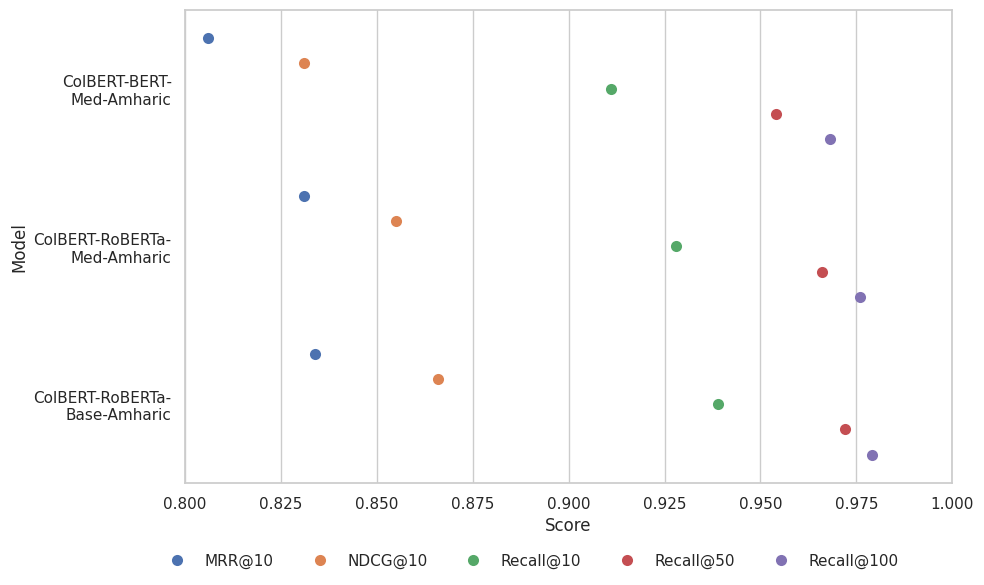

In [25]:
# Dot Plot
dot_df = pd.DataFrame({
    'Model': models,
    'MRR@10': mrr,
    'NDCG@10': ndcg,
    'Recall@10': recall10,
    'Recall@50': recall50,
    'Recall@100': recall100
})

dot_melted = dot_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.stripplot(x='Score', y='Model', hue='Metric', data=dot_melted, jitter=True, dodge=True, size=8)
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0.80, 1.0)
plt.legend(loc='upper center', bbox_to_anchor=(0.45, -0.12), ncol=5, frameon=False)
plt.tight_layout()
plt.savefig("dotplot_colbert_amharic_models.pdf", format="pdf", dpi=300)
plt.show()
plt.close()


In [38]:
# # Dot Plot (connected with lines)
# dot_df = pd.DataFrame({
#     'Model': models,
#     'MRR@10': mrr,
#     'NDCG@10': ndcg,
#     'Recall@10': recall10,
#     'Recall@50': recall50,
#     'Recall@100': recall100
# })

# dot_melted = dot_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
# plt.figure(figsize=(10, 6))
# sns.pointplot(data=dot_melted, x='Score', y='Model', hue='Metric', join=True, markers="o", scale=1.5)
# plt.xlabel("Score")
# plt.ylabel("Model")
# plt.xlim(0.80, 1.0)
# plt.legend(loc='upper center', bbox_to_anchor=(0.45, -0.12), ncol=5, frameon=False)
# plt.tight_layout()
# plt.savefig("dotlineplot_colbert_amharic_models.pdf", format="pdf", dpi=300)
# plt.show()
# plt.close()

In [30]:
# # Bubble Plot
# plot_data['Size'] = plot_data['Score'] * 100  # scale for bubble size
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=plot_data, x='Metric', y='Model', size='Size', hue='Score', sizes=(100, 1000), palette='viridis', legend='brief')
# plt.xlabel('Metric')
# plt.ylabel('Model')
# plt.xlim(-0.5, len(plot_data['Metric'].unique()) - 0.5)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.savefig("bubbleplot_colbert_amharic_models.pdf", format="pdf", dpi=300)
# plt.show()
# plt.close()

In [31]:
# # Bubble Plot with annotations
# plot_data['Size'] = plot_data['Score'] * 100  # scale for bubble size
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=plot_data, x='Metric', y='Model', size='Size', hue='Score', sizes=(100, 1000), palette='viridis', legend='brief')

# # Add text annotations
# for i in range(plot_data.shape[0]):
#     row = plot_data.iloc[i]
#     plt.text(row['Metric'], row['Model'], f"{row['Score']:.3f}", ha='center', va='center', fontsize=9, color='black')

# plt.xlabel('Metric')
# plt.ylabel('Model')
# plt.xlim(-0.5, len(plot_data['Metric'].unique()) - 0.5)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.savefig("bubbleplot_colbert_amharic_models.pdf", format="pdf", dpi=300)
# plt.show()
# plt.close()


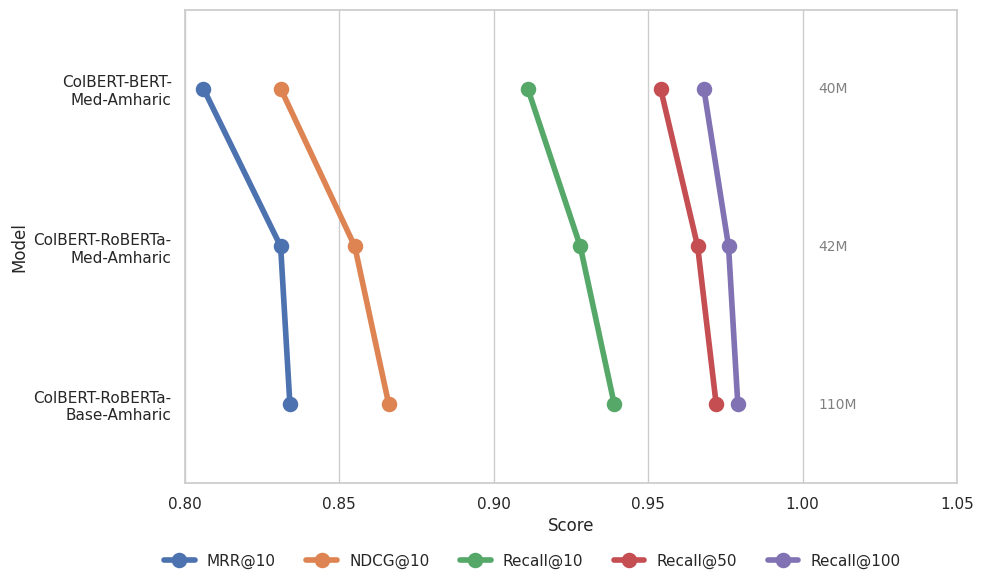

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data from the LaTeX table
models = [
    "ColBERT-BERT-\nMed-Amharic",
    "ColBERT-RoBERTa-\nMed-Amharic",
    "ColBERT-RoBERTa-\nBase-Amharic"
]
params = [40, 42, 110]
mrr = [0.806, 0.831, 0.834]
ndcg = [0.831, 0.855, 0.866]
recall10 = [0.911, 0.928, 0.939]
recall50 = [0.954, 0.966, 0.972]
recall100 = [0.968, 0.976, 0.979]

# Dot Plot (connected with lines)
dot_df = pd.DataFrame({
    'Model': models,
    'MRR@10': mrr,
    'NDCG@10': ndcg,
    'Recall@10': recall10,
    'Recall@50': recall50,
    'Recall@100': recall100,
    'Params': params
})

dot_melted = dot_df.melt(id_vars=['Model', 'Params'], var_name='Metric', value_name='Score')
plt.figure(figsize=(10, 6))
sns.pointplot(data=dot_melted, x='Score', y='Model', hue='Metric', join=True, markers="o", scale=1.5)

# Add parameter annotations
for i, model in enumerate(models):
    plt.text(1.005, i, f"{params[i]}M", va='center', fontsize=10, color='gray')

plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0.80, 1.05)
plt.legend(loc='upper center', bbox_to_anchor=(0.45, -0.12), ncol=5, frameon=False)
plt.tight_layout()
plt.savefig("dotlineplot_colbert_amharic_models.pdf", format="pdf", dpi=300)
plt.show()
plt.close()
